#   H alpha



In [2]:
########### Imports ###############
import astropy
from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import optimize
from astropy.wcs import WCS

In [3]:
import  H_alpha as ha

lights_files, lights_data= ha.lights()
bias_files, bias_data= ha.bias()
dark_files, dark_data = ha.dark()

bias_avg= ha.average_image(bias_data)
dark_avg= ha.average_image(dark_data)

lights_corrected= [ha.corrected_image(light,dark_avg, bias_avg) for light in lights_data]

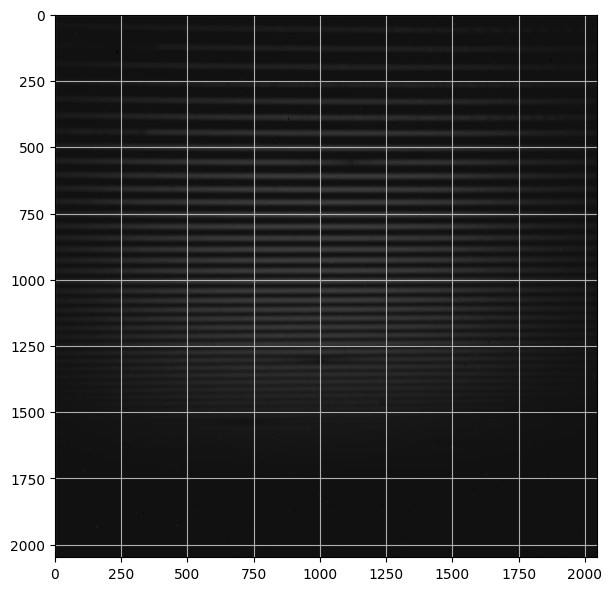

In [4]:
imageLowerRange = 1
imageUpperRange = 2
imageMean = np.mean(lights_corrected[3])
imageSD = np.std(lights_corrected[3])


plt.figure(figsize=(7,14))

#Plot image
plt.grid()

plt.imshow(lights_corrected[0], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))


In [5]:
lights_corrected[0]

array([[-1755.42, -1769.57, -1707.73, ..., -1747.33, -1722.89, -1735.31],
       [-1753.02, -1749.91, -1766.4 , ..., -1758.89, -1722.3 , -1742.68],
       [-1739.13, -1745.84, -1745.63, ..., -1742.18, -1744.58, -1736.62],
       ...,
       [-1730.56, -1736.28, -1738.87, ..., -1731.58, -1727.34, -1766.76],
       [-1754.71, -1765.3 , -1750.51, ..., -1734.16, -1742.8 , -1748.99],
       [-1711.87, -1729.63, -1742.25, ..., -1753.86, -1714.56, -1728.24]])

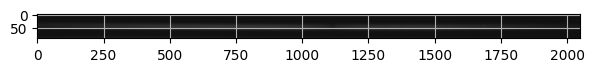

In [6]:
plt.figure(figsize=(7,14))

#Plot image
plt.grid()

plt.imshow(lights_corrected[0][510:600], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

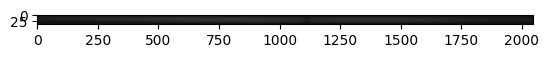

In [7]:

plt.imshow(lights_corrected[0][540:577], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

In [8]:
lights_corrected[0][550:600]

array([[-1442.3 , -1426.66, -1457.22, ..., -1561.76, -1595.57, -1593.62],
       [-1387.01, -1437.29, -1436.12, ..., -1576.03, -1576.35, -1556.88],
       [-1450.41, -1430.81, -1386.93, ..., -1554.03, -1567.18, -1558.75],
       ...,
       [-1525.06, -1533.97, -1530.34, ..., -1651.2 , -1661.07, -1643.42],
       [-1517.62, -1519.43, -1496.59, ..., -1647.38, -1646.51, -1650.62],
       [-1508.57, -1469.18, -1474.39, ..., -1643.63, -1631.71, -1650.29]])

Text(0.5, 0, 'X pixel')

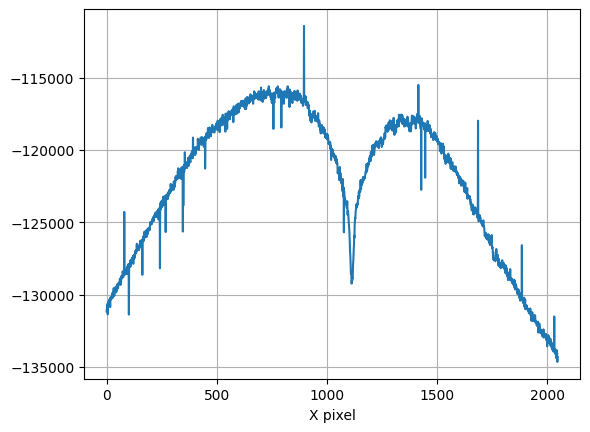

In [9]:
plt.plot(np.sum(lights_corrected[0][520:600],axis=0))
plt.grid()
plt.xlabel('X pixel')


Text(0.5, 0, 'Y pixel')

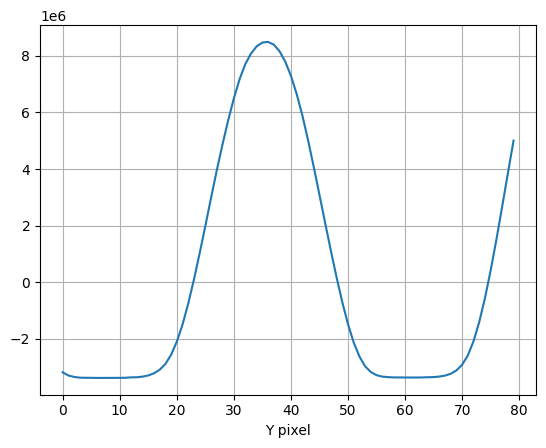

In [28]:
plt.plot(np.sum(lights_corrected[7][520:600],axis=1))
plt.grid()
plt.xlabel('Y pixel')

Text(0.5, 0, 'X pixel')

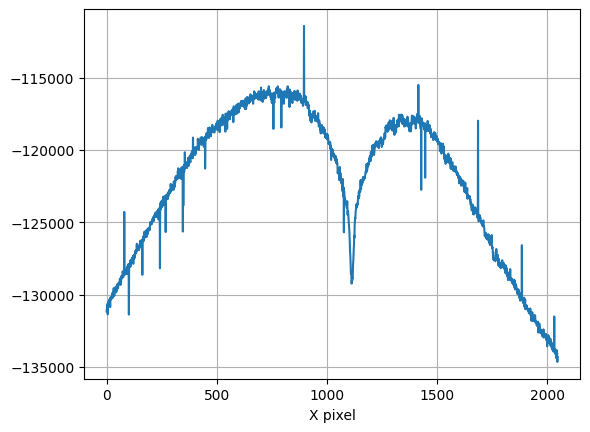

In [11]:
plt.plot(np.sum(lights_corrected[0][520:600],axis=0))
plt.grid()
plt.xlabel('X pixel')

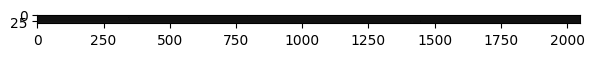

In [12]:
plt.figure(figsize=(7,14))

#Plot image


plt.imshow(lights_corrected[0][512:545], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

In [13]:
def back_corr(light_subset,a_subset,b_subset):
    a= np.mean(np.sum(a_subset,axis=0))
    b= np.mean(np.sum(b_subset,axis=0))

    l= np.sum(light_subset,axis=0)

    return l- len(l)*((a+b)/2)

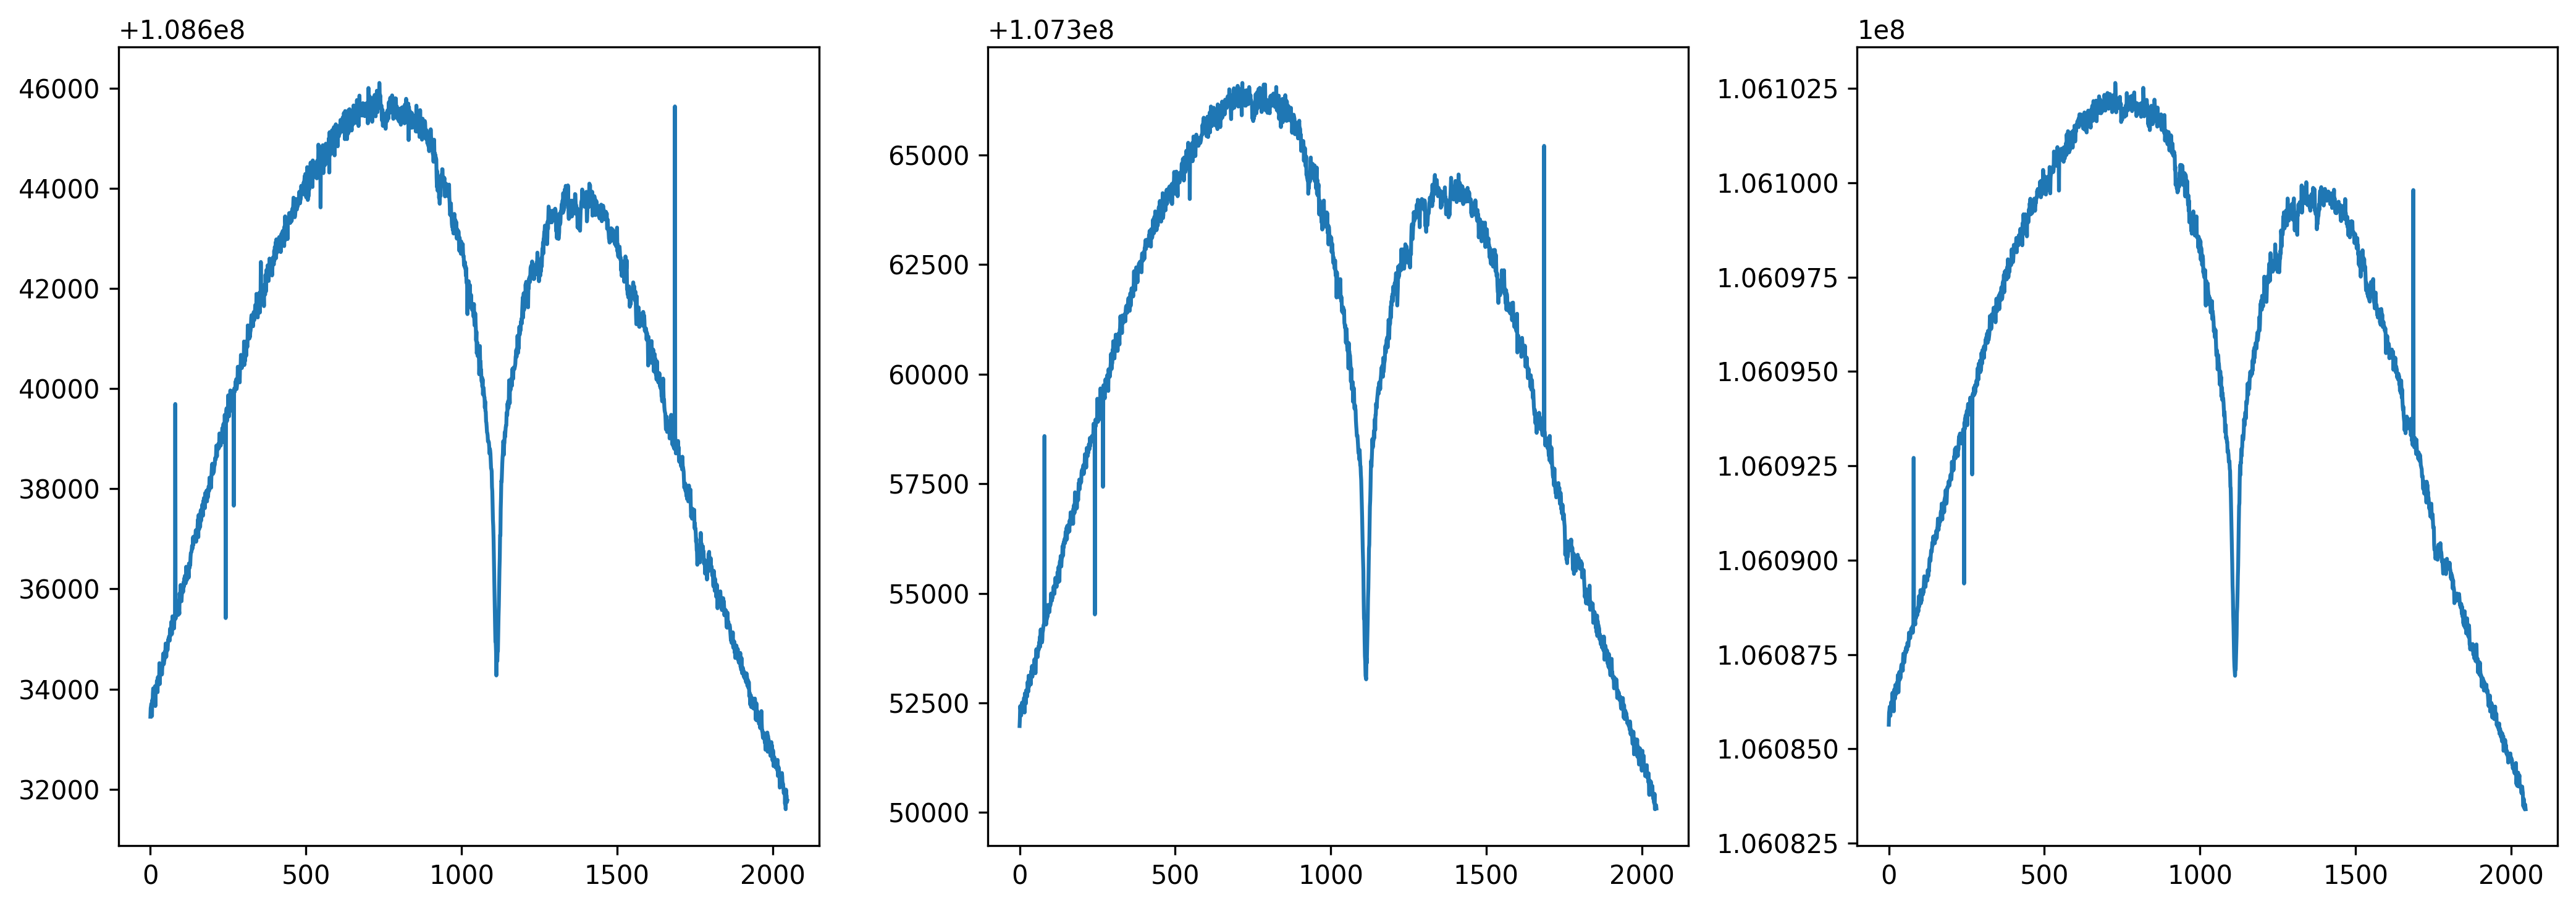

In [14]:
fig,ax=plt.subplots(1,3, figsize=(14,5), dpi=300)
ax[0].plot(back_corr(lights_corrected[0][545:567],lights_corrected[0][512:545],lights_corrected[0][565:597]))
ax[1].plot(back_corr(lights_corrected[1][545:567],lights_corrected[1][512:545],lights_corrected[1][565:597]))
ax[2].plot(back_corr(lights_corrected[2][545:567],lights_corrected[2][512:545],lights_corrected[2][565:597]))

plt.tight_layout()

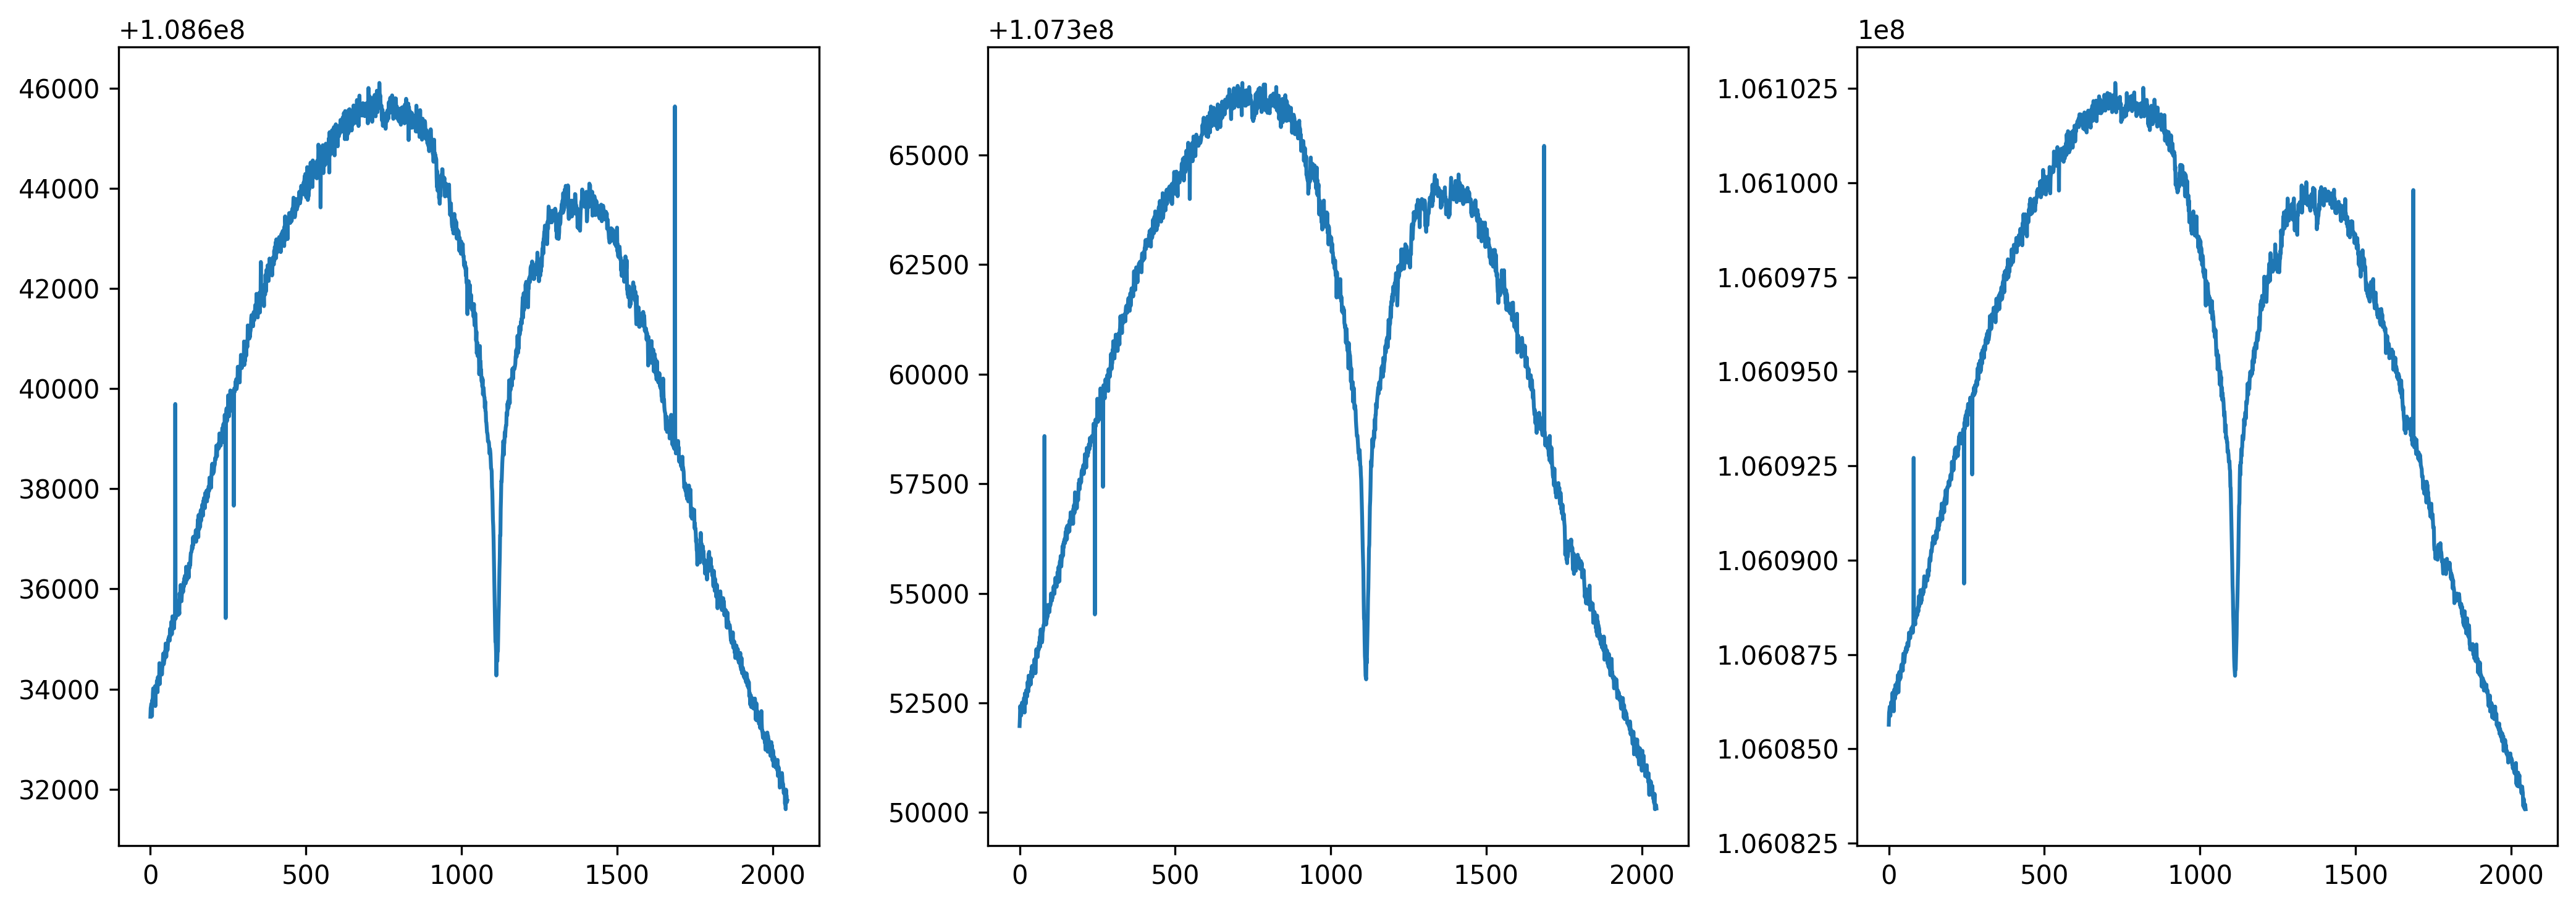

In [15]:
fig,ax=plt.subplots(1,3, figsize=(14,5), dpi=300)
ax[0].plot(back_corr(lights_corrected[0][545:567],lights_corrected[0][512:545],lights_corrected[0][565:597]))
ax[1].plot(back_corr(lights_corrected[1][545:567],lights_corrected[1][512:545],lights_corrected[1][565:597]))
ax[2].plot(back_corr(lights_corrected[2][545:567],lights_corrected[2][512:545],lights_corrected[2][565:597]))

plt.tight_layout()

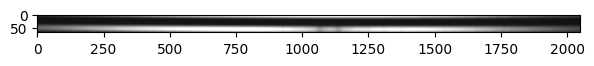

In [16]:
plt.figure(figsize=(7,14))

#Plot image


plt.imshow(lights_corrected[3][500:567], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

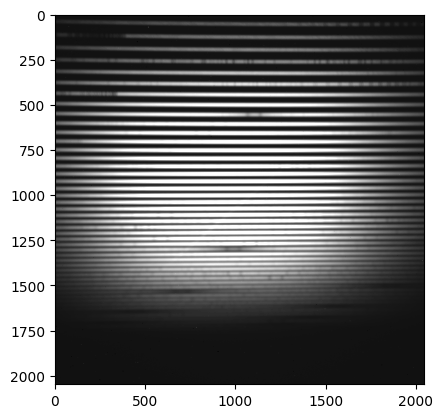

In [17]:
imageLowerRange = 1
imageUpperRange = 2
imageMean = np.mean(lights_corrected[3])
imageSD = np.std(lights_corrected[3])
plt.imshow(lights_corrected[3], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

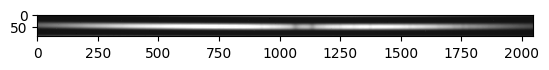

In [18]:
plt.imshow(lights_corrected[3][506:595], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

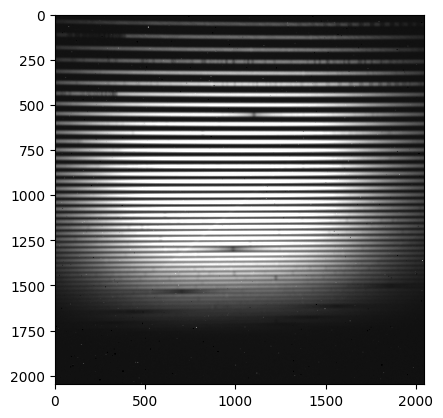

In [19]:
imageLowerRange = 1
imageUpperRange = 2
imageMean = np.mean(lights_corrected[4])
imageSD = np.std(lights_corrected[4])
plt.imshow(lights_corrected[4], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

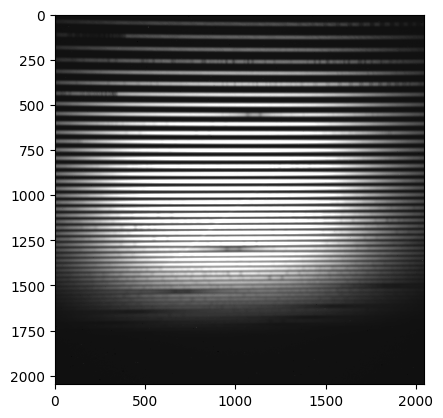

In [20]:
imageLowerRange = 1
imageUpperRange = 2
imageMean = np.mean(lights_corrected[5])
imageSD = np.std(lights_corrected[5])
plt.imshow(lights_corrected[5], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

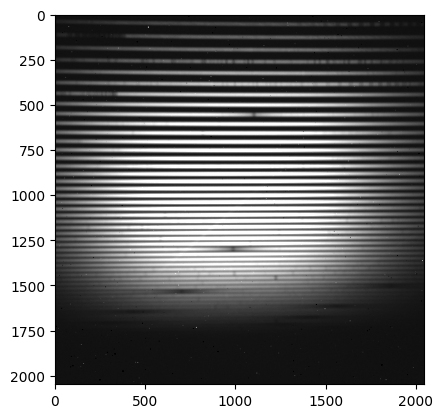

In [21]:
imageLowerRange = 1
imageUpperRange = 2
imageMean = np.mean(lights_corrected[6])
imageSD = np.std(lights_corrected[6])
plt.imshow(lights_corrected[6], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

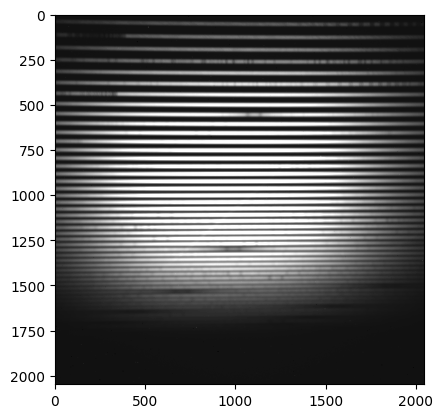

In [22]:
imageLowerRange = 1
imageUpperRange = 2
imageMean = np.mean(lights_corrected[7])
imageSD = np.std(lights_corrected[7])
plt.imshow(lights_corrected[7], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

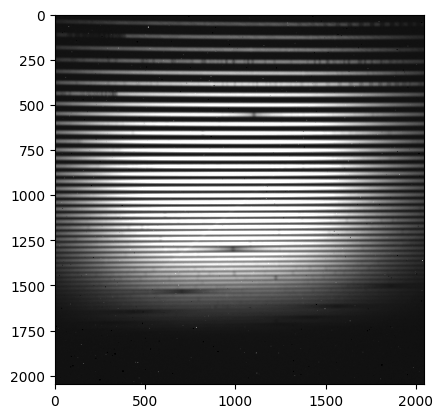

In [23]:
imageLowerRange = 1
imageUpperRange = 2
imageMean = np.mean(lights_corrected[8])
imageSD = np.std(lights_corrected[8])
plt.imshow(lights_corrected[8], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

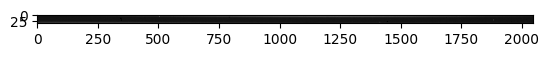

In [24]:

plt.imshow(lights_corrected[1][512:545], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

In [25]:
l= np.sum(lights_corrected[0][545:567],axis=0)

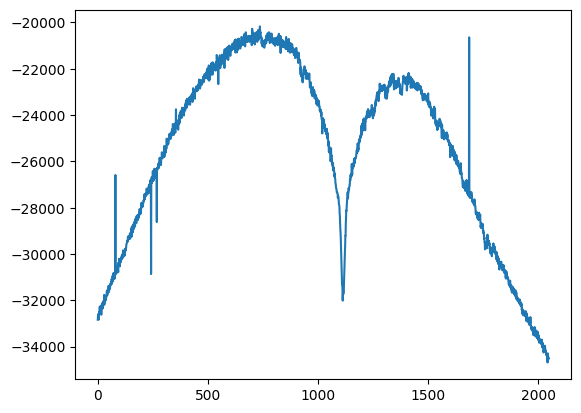

In [26]:
plt.plot(l)

In [27]:
avg=(a+b)/2
l_corr=l- len(l)*avg

NameError: name 'a' is not defined

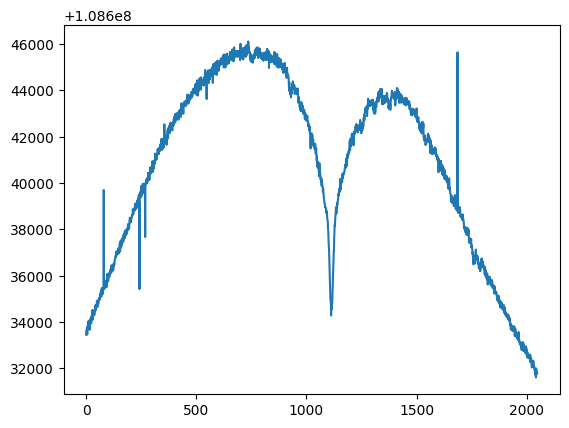

In [ ]:
plt.plot(l_corr)

In [ ]:

plt.imshow(lights_corrected[0][540:577], cmap='gray', vmin=imageMean - (imageLowerRange * imageSD),
           vmax=imageMean + (imageUpperRange * imageSD))

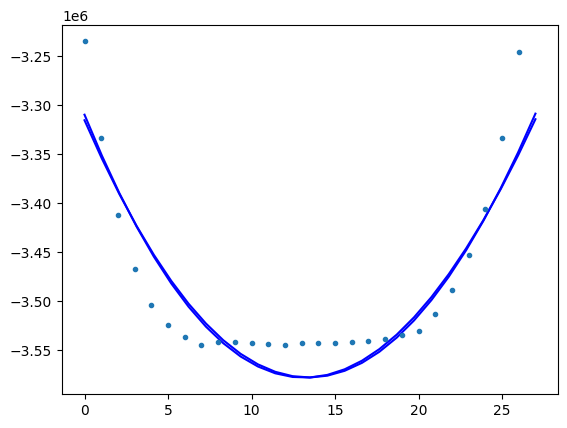

In [ ]:
from scipy import optimize
from scipy import ndimage

def func(x, a, b, c):
    return a *x**2+b*x+c

def func2(x, a, b, c,d):
    return a *x**3+b*x**2+c*x+d

def gaussian(x,x0,sigma):
    return (1/(sigma*np.sqrt(2*np.pi))*np.exp(-((x-x0)**2)/(2*sigma**2)))


x_data = np.linspace(0, 27, 27)  # Generate 50 points from -10 to 10

popt, pcov = optimize.curve_fit(func, x_data, np.sum(lights_corrected[0][518:545],axis=1))  # popt contains best-fit parameters
plt.plot(x_data, func(x_data, *popt), label="Fitted curve", color='blue')

popt2, pcov2 = optimize.curve_fit(func2, x_data, np.sum(lights_corrected[0][518:545],axis=1))  # popt contains best-fit parameters
plt.plot(x_data, func2(x_data, *popt2), label="Fitted curve", color='blue')

\

plt.plot(np.sum(lights_corrected[0][518:545],axis=1), '.')

# Fit

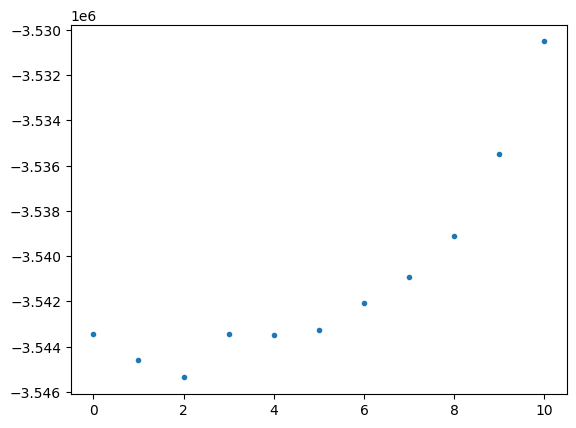

In [ ]:
plt.plot(np.sum(lights_corrected[0][528:539],axis=1), '.')


In [ ]:
np.mean(np.sum(lights_corrected[0][528:539],axis=1))

-3541055.316363637

In [ ]:
np.mean(np.sum(lights_corrected[0][528:539],axis=1))

-3541055.316363637

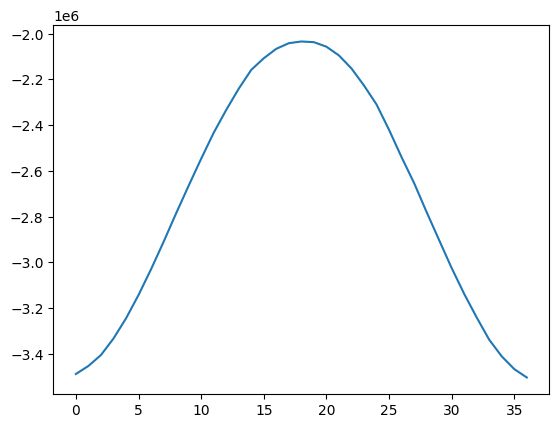

In [ ]:
plt.plot(np.sum(lights_corrected[0][540:577],axis=1))

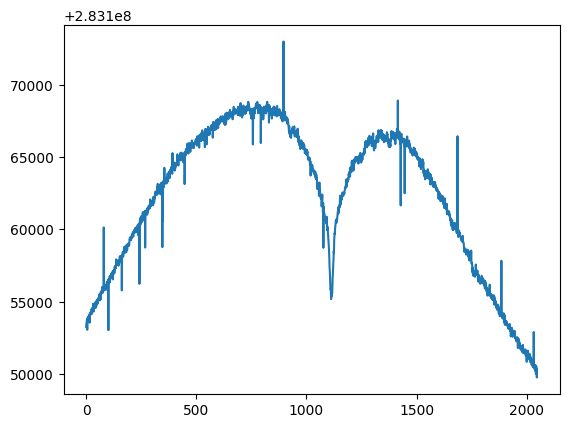

In [ ]:
plt.plot(np.sum(lights_corrected[0][520:600],axis=0)-80*np.mean(np.sum(lights_corrected[0][528:539],axis=1)))

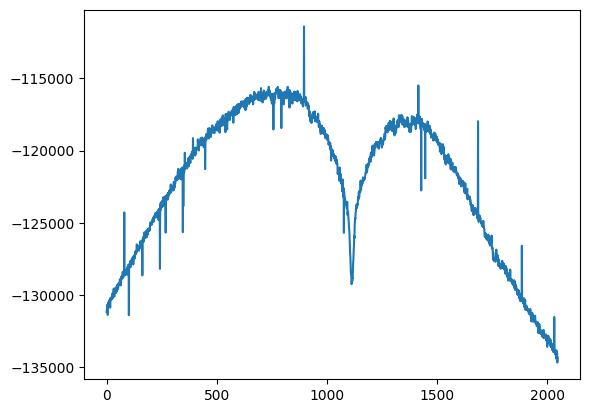

In [ ]:
plt.plot(np.sum(lights_corrected[0][520:600],axis=0))


In [ ]:
plt.plot(np.sum(lights_corrected[0][520:600],axis=0))

In [ ]:
def plot_initialisation():
    """
    Initialize a plot for the spectrum of Vega, focusing on the Hε (hydrogen epsilon) region.

    This function creates a Matplotlib figure with predefined size, title, labels, and a grid.

    Parameters:
    None

    Returns:
    None (displays an empty figure ready for data plotting).
    """
    plt.figure(figsize=(14, 7))
    plt.title(r"Spectrum of Vega focus on region of $H_{\epsilon}$")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Sample (Counts)")
    plt.grid()


In [ ]:
def choose_val(min, max, sample_min=-119000, sample_max=-115000):
    """
    Selects a range of wavelength and sample values based on given conditions.

    Parameters:
    min (float): Minimum wavelength value for selection.
    max (float): Maximum wavelength value for selection.
    sample_min (float, optional): Minimum sample value to filter data (default is 0).

    Returns:
    tuple of numpy.ndarray:
        - wavelength_range (numpy.ndarray): Selected wavelength values within the specified range.
        - sample_range (numpy.ndarray): Corresponding sample values within the specified range.
    """
    index = np.where((wavelength > min) & (wavelength < max)&(sample> sample_min)&(sample< sample_max))
    wavelength_range = wavelength[index]
    sample_range = sample[index]

    return wavelength_range, sample_range

In [ ]:
def fitting_plot(x, y, plot=False):
    """
    Fits a quadratic polynomial to the given data and optionally plots the fit.

    Parameters:
    x (array-like): Independent variable (wavelength or other).
    y (array-like): Dependent variable (sample counts or other).
    plot (bool, optional): If True, plots the polynomial fit (default is False).

    Returns:
    tuple:
        - a (float): Coefficient of x^2.
        - b (float): Coefficient of x.
        - c (float): Constant term.
    """
    a, b, c = np.polyfit(x, y, 2)

    if plot:
        plt.plot(x, a*x**2 + b*x + c, label=fr"${round(a,1)}x^2 + {round(b,1)}x + {round(c,1)}$")
        plt.legend()

    return a, b, c

def polynomial_2(x, a, b, c):
    """
    Computes a quadratic polynomial function.

    Parameters:
    x (array-like or float): Input variable(s).
    a (float): Coefficient of x^2.
    b (float): Coefficient of x.
    c (float): Constant term.

    Returns:
    numpy.ndarray or float: Computed polynomial values at x.
    """
    return a*x**2 + b*x + c

In [ ]:
sample= np.sum(lights_corrected[0][520:600],axis=0)
wavelength=wavelength= np.linspace(0,2048,2048)


Text(0.5, 0, 'X pixel')

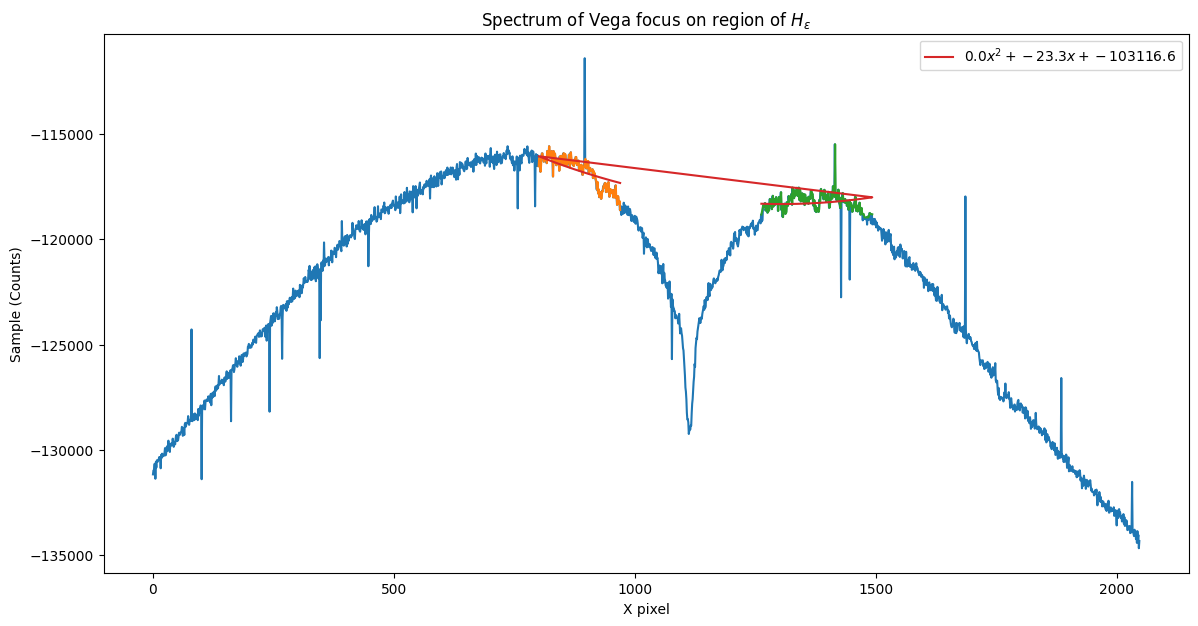

In [ ]:
plot_initialisation()

x_bf,y_bf =choose_val(800, 970)[0], choose_val(800, 970)[1]

#Choosing values after H_epsilon (range 399-404)
x_af,y_af =choose_val(1250, 1500)[0], choose_val(1250, 1500)[1]

#Concatenating up the two sets of data (before and after)
x_concat= np.concatenate((x_af,x_bf))
y_concat=np.concatenate((y_af,y_bf))

plt.plot(np.sum(lights_corrected[0][520:600],axis=0))

plt.plot(choose_val(800, 970)[0], choose_val(800, 970)[1])
plt.plot(choose_val(1250, 1500)[0], choose_val(1250, 1500)[1])

fitting_plot(x_concat,y_concat, plot=True)
plt.grid()
plt.xlabel('X pixel')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Simulated wavelength and flux (replace with real data)
wavelength = np.linspace(650, 660, 100)  # Example range around H-alpha
flux = np.exp(-((wavelength - 656.3)/0.2)**2) + 1 + np.random.normal(0, 0.02, len(wavelength))  # Absorption + noise
flux_err = 0.02  # Estimated uncertainty

# Initial continuum fit (Spline)
continuum_mask = (wavelength < 655.5) | (wavelength > 657.0)  # Define continuum regions
cont_fit = UnivariateSpline(wavelength[continuum_mask], flux[continuum_mask], k=3, s=0.1)
continuum = cont_fit(wavelength)

# Monte Carlo Resampling
N_realizations = 1000
continuum_samples = np.zeros((N_realizations, len(wavelength)))

for i in range(N_realizations):
    flux_noisy = flux + np.random.normal(0, flux_err, len(flux))  # Add noise
    cont_fit_noisy = UnivariateSpline(wavelength[continuum_mask], flux_noisy[continuum_mask], k=3, s=0.1)
    continuum_samples[i] = cont_fit_noisy(wavelength)  # Store each realization

# Compute the continuum uncertainty
continuum_err = np.std(continuum_samples, axis=0)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(wavelength, flux, label="Spectrum", alpha=0.7)
plt.plot(wavelength, continuum, '--', label="Continuum Fit", color='red')
plt.fill_between(wavelength, continuum - continuum_err, continuum + continuum_err,
                 color='red', alpha=0.3, label="Continuum Error (1σ)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Flux")
plt.legend()
plt.title("Monte Carlo Resampling of Continuum Fit")
plt.show()
